In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-07-01 14:56:19.066215


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1114.1244)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.3605)tensor(5.6901)tensor(4.1909)tensor(4.0899)tensor(3.3749)tensor(2.7160)tensor(6.9089)tensor(3.2532)tensor(3.3485)tensor(3.4223)tensor(5.9736)tensor(3.0737)tensor(3.4739)tensor(4.3689)tensor(3.6484)tensor(3.9607)tensor(6.0909)tensor(2.9274)tensor(3.2796)tensor(4.2644)tensor(7.9829)tensor(4.2925)tensor(5.9977)tensor(4.6525)tensor(6.7819)tensor(7.2863)tensor(4.8747)tensor(6.4654)tensor(6.6859)tensor(5.9707)tensor(6.8642)tensor(6.8642)tensor(7.8129)tensor(5.8154)tensor(4.3043)tensor(3.1824)tensor(6.9607)tensor(7.4620)tensor(4.2114)tensor(5.5518)tensor(3.0883)tensor(4.6607)tensor(5.7068)tensor(3.1294)tensor(4.5259)tensor(3.3416)tensor(9.2512)tensor(6.5861)tensor(8.8671)tensor(7.1132)tensor(2.8375)tensor(4.2114)tensor(5.1413)tensor(3.2673)tensor(6.2804)tensor(4.3140)tensor(4.5375)tensor(4.5294)tensor(6.1131)tensor(7.1684)tensor(3.1335)tensor(4.9295)tensor(5.6596)tensor(7.2089)tensor(5.8413)tensor(3.6257)tensor(3.1745)tensor(3.4070)tensor(3.2054)tensor(5.4787)tensor(3.1958)tensor

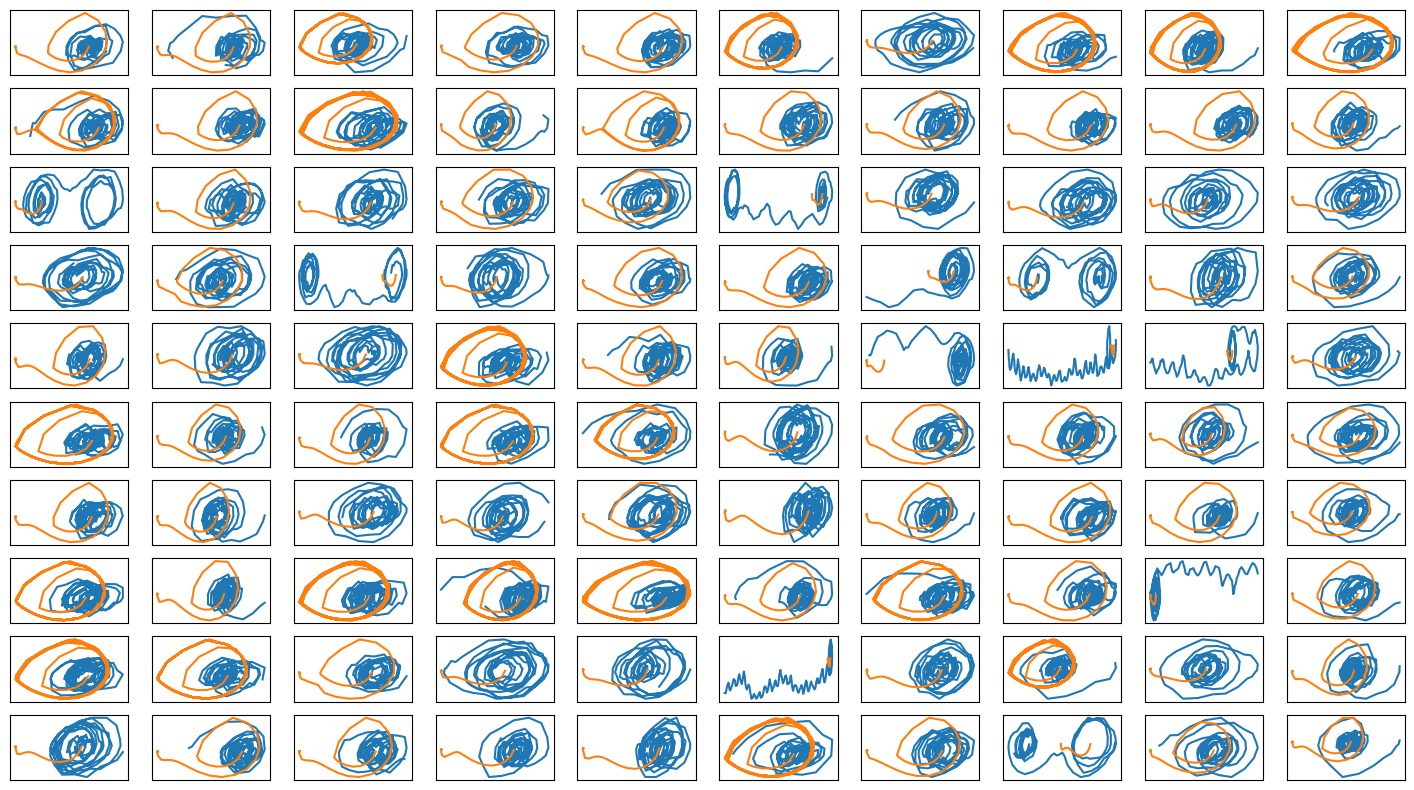

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 12615.66921  validloss 522.97064±0.00000  bestvalidloss 522.97064  last_update 0
train: iter 1  trainloss 973.73892  validloss 472.23406±0.00000  bestvalidloss 472.23406  last_update 0
train: iter 2  trainloss 539.09566  validloss 435.34002±0.00000  bestvalidloss 435.34002  last_update 0
train: iter 3  trainloss 537.10213  validloss 430.00710±0.00000  bestvalidloss 430.00710  last_update 0
train: iter 4  trainloss 503.08496  validloss 417.92060±0.00000  bestvalidloss 417.92060  last_update 0
train: iter 5  trainloss 485.38156  validloss 415.16069±0.00000  bestvalidloss 415.16069  last_update 0
train: iter 6  trainloss 486.56373  validloss 403.59532±0.00000  bestvalidloss 403.59532  last_update 0
train: iter 7  trainloss 469.23453  validloss 404.32941±0.00000  bestvalidloss 403.59532  last_update 1
train: iter 8  trainloss 463.02050  validloss 399.03633±0.00000  bestvalidloss 399.03633  last_update 0
train: iter 9  trainloss 456.92640  validlo

train: iter 78  trainloss -220.20761  validloss -365.61773±0.00000  bestvalidloss -365.61773  last_update 0
train: iter 79  trainloss -223.73256  validloss -382.21273±0.00000  bestvalidloss -382.21273  last_update 0
train: iter 80  trainloss -219.61203  validloss -370.01677±0.00000  bestvalidloss -382.21273  last_update 1
train: iter 81  trainloss -256.59519  validloss -403.59299±0.00000  bestvalidloss -403.59299  last_update 0
train: iter 82  trainloss -259.90441  validloss -380.75725±0.00000  bestvalidloss -403.59299  last_update 1
train: iter 83  trainloss -257.33154  validloss -423.86729±0.00000  bestvalidloss -423.86729  last_update 0
train: iter 84  trainloss -276.90488  validloss -423.34686±0.00000  bestvalidloss -423.86729  last_update 1
train: iter 85  trainloss -285.58323  validloss -428.81708±0.00000  bestvalidloss -428.81708  last_update 0
train: iter 86  trainloss -304.34308  validloss -437.51464±0.00000  bestvalidloss -437.51464  last_update 0
train: iter 87  trainloss -3

train: iter 154  trainloss -535.74474  validloss -680.09749±0.00000  bestvalidloss -684.20658  last_update 1
train: iter 155  trainloss -518.11795  validloss -657.55996±0.00000  bestvalidloss -684.20658  last_update 2
train: iter 156  trainloss -533.92796  validloss -685.34763±0.00000  bestvalidloss -685.34763  last_update 0
train: iter 157  trainloss -531.80944  validloss -673.64449±0.00000  bestvalidloss -685.34763  last_update 1
train: iter 158  trainloss -538.30692  validloss -679.00654±0.00000  bestvalidloss -685.34763  last_update 2
train: iter 159  trainloss -548.72955  validloss -701.38679±0.00000  bestvalidloss -701.38679  last_update 0
train: iter 160  trainloss -536.15126  validloss -695.01144±0.00000  bestvalidloss -701.38679  last_update 1
train: iter 161  trainloss -541.83986  validloss -690.05767±0.00000  bestvalidloss -701.38679  last_update 2
train: iter 162  trainloss -523.69427  validloss -698.87943±0.00000  bestvalidloss -701.38679  last_update 3
train: iter 163  tr

train: iter 230  trainloss -615.24225  validloss -766.12644±0.00000  bestvalidloss -782.41538  last_update 4
train: iter 231  trainloss -611.93293  validloss -708.94192±0.00000  bestvalidloss -782.41538  last_update 5
train: iter 232  trainloss -626.27895  validloss -775.00640±0.00000  bestvalidloss -782.41538  last_update 6
train: iter 233  trainloss -621.16419  validloss -790.51620±0.00000  bestvalidloss -790.51620  last_update 0
train: iter 234  trainloss -593.94459  validloss -752.47097±0.00000  bestvalidloss -790.51620  last_update 1
train: iter 235  trainloss -616.31988  validloss -665.54454±0.00000  bestvalidloss -790.51620  last_update 2
train: iter 236  trainloss -629.18494  validloss -782.91876±0.00000  bestvalidloss -790.51620  last_update 3
train: iter 237  trainloss -620.59487  validloss -768.83786±0.00000  bestvalidloss -790.51620  last_update 4
train: iter 238  trainloss -630.08539  validloss -763.18097±0.00000  bestvalidloss -790.51620  last_update 5
train: iter 239  tr

train: iter 305  trainloss -632.77684  validloss -814.78549±0.00000  bestvalidloss -823.18511  last_update 25
train: iter 306  trainloss -638.30653  validloss -812.67147±0.00000  bestvalidloss -823.18511  last_update 26
train: iter 307  trainloss -639.18386  validloss -813.67010±0.00000  bestvalidloss -823.18511  last_update 27
train: iter 308  trainloss -650.59143  validloss -812.00826±0.00000  bestvalidloss -823.18511  last_update 28
train: iter 309  trainloss -650.11458  validloss -817.46475±0.00000  bestvalidloss -823.18511  last_update 29
train: iter 310  trainloss -658.66575  validloss -790.22482±0.00000  bestvalidloss -823.18511  last_update 30
train: iter 311  trainloss -641.60965  validloss -840.03459±0.00000  bestvalidloss -840.03459  last_update 0
train: iter 312  trainloss -664.06750  validloss -816.40339±0.00000  bestvalidloss -840.03459  last_update 1
train: iter 313  trainloss -670.11215  validloss -821.15947±0.00000  bestvalidloss -840.03459  last_update 2
train: iter 3

train: iter 380  trainloss -626.75372  validloss -811.26159±0.00000  bestvalidloss -840.03459  last_update 69
train: iter 381  trainloss -623.79119  validloss -809.28126±0.00000  bestvalidloss -840.03459  last_update 70
train: iter 382  trainloss -626.65246  validloss -787.69539±0.00000  bestvalidloss -840.03459  last_update 71
train: iter 383  trainloss -617.66572  validloss -754.75116±0.00000  bestvalidloss -840.03459  last_update 72
train: iter 384  trainloss -629.98478  validloss -793.55904±0.00000  bestvalidloss -840.03459  last_update 73
train: iter 385  trainloss -632.75499  validloss -815.20422±0.00000  bestvalidloss -840.03459  last_update 74
train: iter 386  trainloss -628.30664  validloss -813.50070±0.00000  bestvalidloss -840.03459  last_update 75
train: iter 387  trainloss -615.77858  validloss -826.38431±0.00000  bestvalidloss -840.03459  last_update 76
train: iter 388  trainloss -630.82444  validloss -814.78040±0.00000  bestvalidloss -840.03459  last_update 77
train: ite

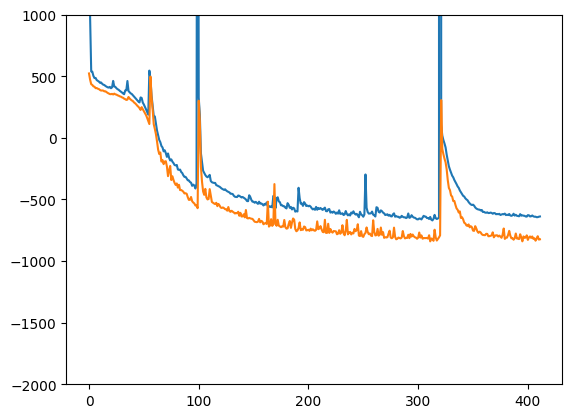

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


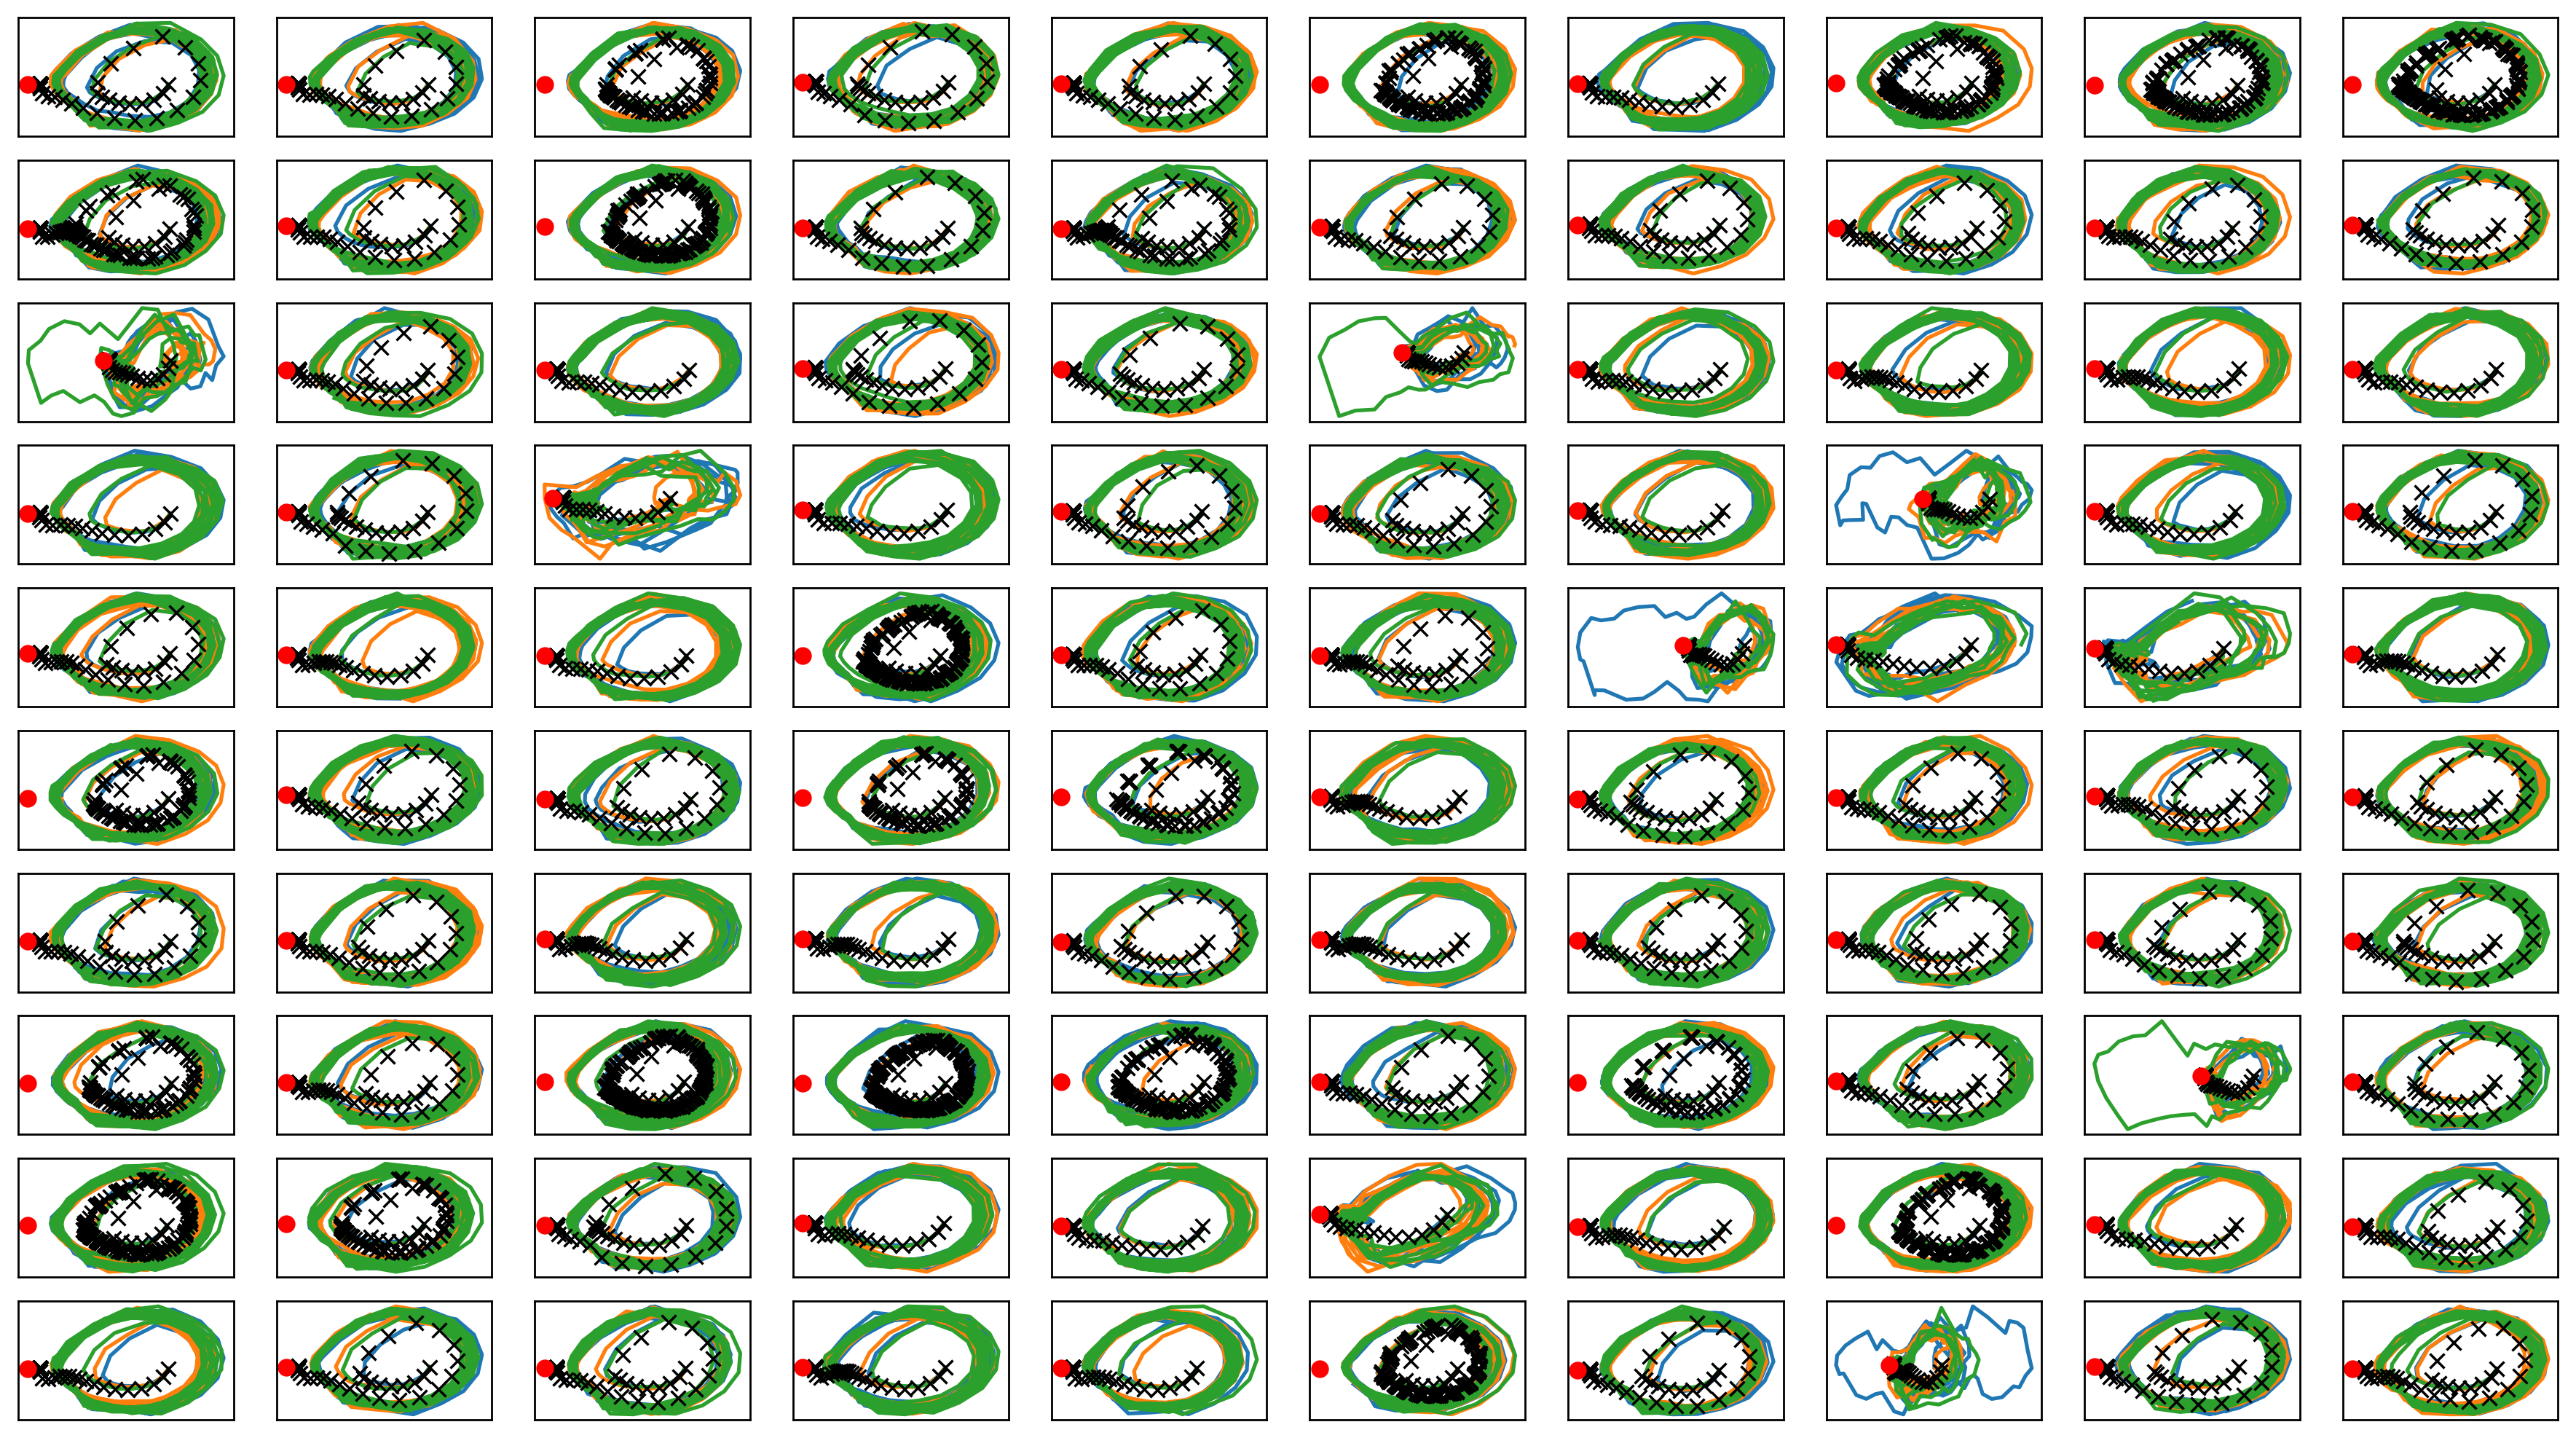

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

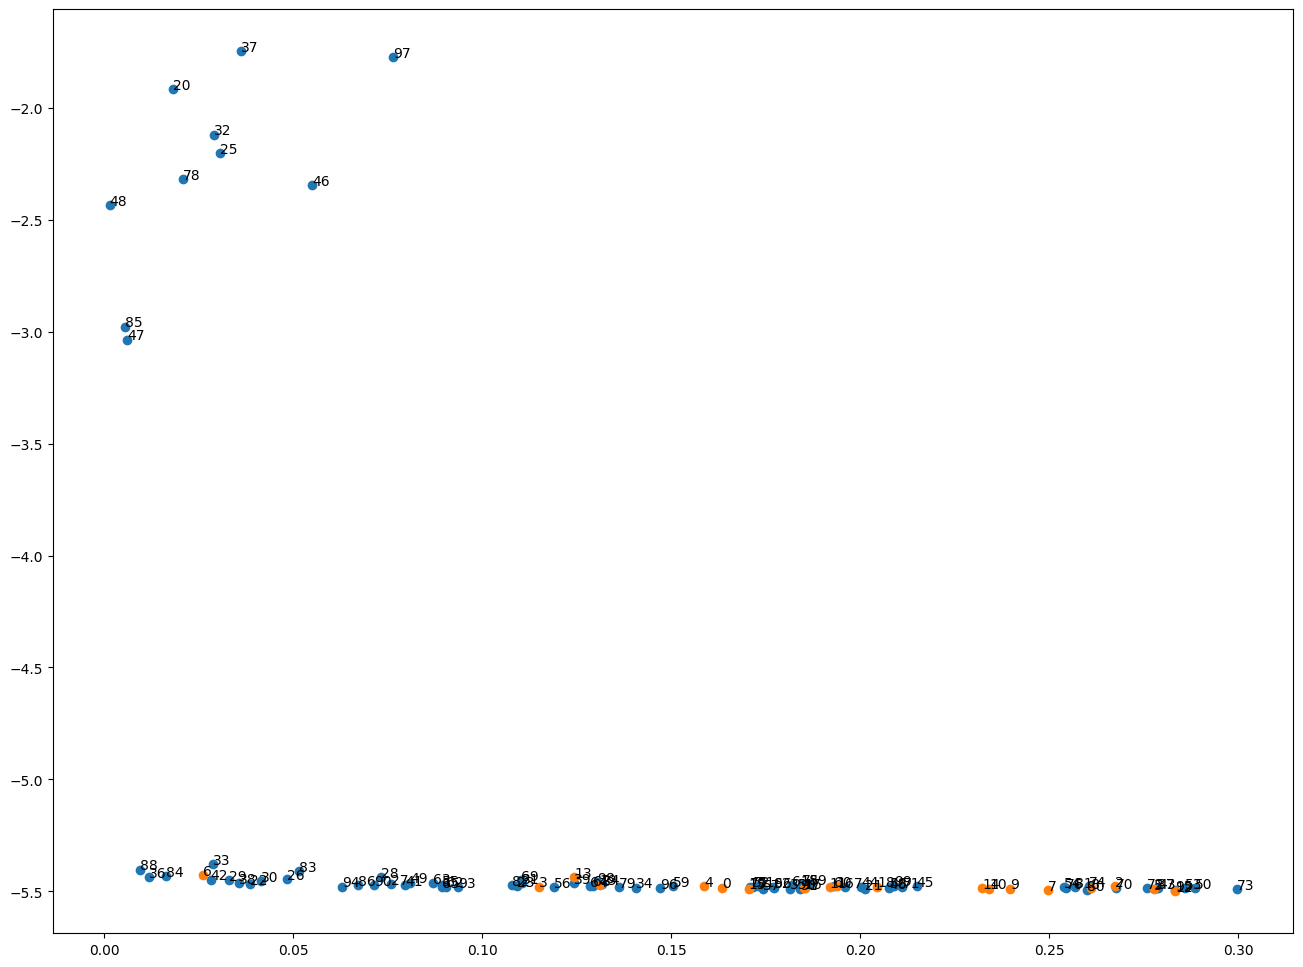

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


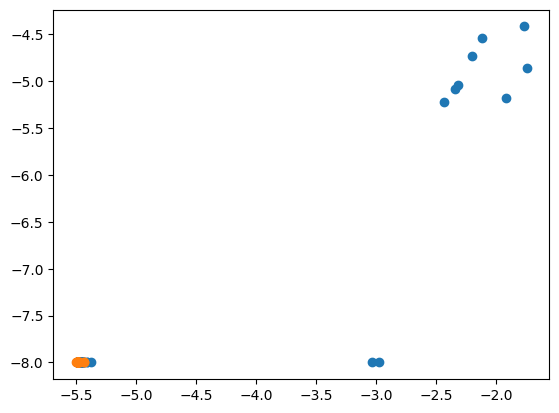

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 13.69221  validloss 15.95602±0.00000  bestvalidloss 15.95602  last_update 0
train: iter 1  trainloss 12.51412  validloss 14.47866±0.00000  bestvalidloss 14.47866  last_update 0
train: iter 2  trainloss 11.45333  validloss 13.22365±0.00000  bestvalidloss 13.22365  last_update 0
train: iter 3  trainloss 10.56394  validloss 12.18233±0.00000  bestvalidloss 12.18233  last_update 0
train: iter 4  trainloss 9.77115  validloss 11.21473±0.00000  bestvalidloss 11.21473  last_update 0
train: iter 5  trainloss 9.08688  validloss 10.44768±0.00000  bestvalidloss 10.44768  last_update 0
train: iter 6  trainloss 8.47730  validloss 9.72746±0.00000  bestvalidloss 9.72746  last_update 0
train: iter 7  trainloss 7.94487  validloss 9.07046±0.00000  bestvalidloss 9.07046  last_update 0
train: iter 8  trainloss 7.45936  validloss 8.49955±0.00000  bestvalidloss 8.49955  last_update 0
train: iter 9  trainloss 7.02612  validloss 8.00019±0.00000  bestvalidloss 8.00019  last_update 0
trai

train: iter 85  trainloss 1.90812  validloss 1.91252±0.00000  bestvalidloss 1.91252  last_update 0
train: iter 86  trainloss 1.88740  validloss 1.88846±0.00000  bestvalidloss 1.88846  last_update 0
train: iter 87  trainloss 1.86910  validloss 1.85837±0.00000  bestvalidloss 1.85837  last_update 0
train: iter 88  trainloss 1.84163  validloss 1.83206±0.00000  bestvalidloss 1.83206  last_update 0
train: iter 89  trainloss 1.82656  validloss 1.80432±0.00000  bestvalidloss 1.80432  last_update 0
train: iter 90  trainloss 1.79807  validloss 1.77160±0.00000  bestvalidloss 1.77160  last_update 0
train: iter 91  trainloss 1.77538  validloss 1.74253±0.00000  bestvalidloss 1.74253  last_update 0
train: iter 92  trainloss 1.75926  validloss 1.71377±0.00000  bestvalidloss 1.71377  last_update 0
train: iter 93  trainloss 1.73784  validloss 1.68478±0.00000  bestvalidloss 1.68478  last_update 0
train: iter 94  trainloss 1.71693  validloss 1.65291±0.00000  bestvalidloss 1.65291  last_update 0
train: ite

train: iter 170  trainloss 1.48848  validloss 1.06558±0.00000  bestvalidloss 1.06558  last_update 0
train: iter 171  trainloss 1.47892  validloss 1.06785±0.00000  bestvalidloss 1.06558  last_update 1
train: iter 172  trainloss 1.47879  validloss 1.06689±0.00000  bestvalidloss 1.06558  last_update 2
train: iter 173  trainloss 1.49011  validloss 1.06654±0.00000  bestvalidloss 1.06558  last_update 3
train: iter 174  trainloss 1.49487  validloss 1.06705±0.00000  bestvalidloss 1.06558  last_update 4
train: iter 175  trainloss 1.48393  validloss 1.06111±0.00000  bestvalidloss 1.06111  last_update 0
train: iter 176  trainloss 1.49236  validloss 1.06678±0.00000  bestvalidloss 1.06111  last_update 1
train: iter 177  trainloss 1.50726  validloss 1.06537±0.00000  bestvalidloss 1.06111  last_update 2
train: iter 178  trainloss 1.47316  validloss 1.06504±0.00000  bestvalidloss 1.06111  last_update 3
train: iter 179  trainloss 1.48920  validloss 1.06562±0.00000  bestvalidloss 1.06111  last_update 4


train: iter 255  trainloss 1.47807  validloss 1.05332±0.00000  bestvalidloss 1.05189  last_update 1
train: iter 256  trainloss 1.47391  validloss 1.04968±0.00000  bestvalidloss 1.04968  last_update 0
train: iter 257  trainloss 1.48276  validloss 1.05326±0.00000  bestvalidloss 1.04968  last_update 1
train: iter 258  trainloss 1.47720  validloss 1.05139±0.00000  bestvalidloss 1.04968  last_update 2
train: iter 259  trainloss 1.47805  validloss 1.04936±0.00000  bestvalidloss 1.04936  last_update 0
train: iter 260  trainloss 1.48492  validloss 1.05347±0.00000  bestvalidloss 1.04936  last_update 1
train: iter 261  trainloss 1.48803  validloss 1.05406±0.00000  bestvalidloss 1.04936  last_update 2
train: iter 262  trainloss 1.48527  validloss 1.05465±0.00000  bestvalidloss 1.04936  last_update 3
train: iter 263  trainloss 1.49116  validloss 1.05461±0.00000  bestvalidloss 1.04936  last_update 4
train: iter 264  trainloss 1.46694  validloss 1.05220±0.00000  bestvalidloss 1.04936  last_update 5


train: iter 342  trainloss 1.47264  validloss 1.05210±0.00000  bestvalidloss 1.04936  last_update 83
train: iter 343  trainloss 1.48071  validloss 1.05158±0.00000  bestvalidloss 1.04936  last_update 84
train: iter 344  trainloss 1.50408  validloss 1.04882±0.00000  bestvalidloss 1.04882  last_update 0
train: iter 345  trainloss 1.48133  validloss 1.05612±0.00000  bestvalidloss 1.04882  last_update 1
train: iter 346  trainloss 1.47919  validloss 1.05441±0.00000  bestvalidloss 1.04882  last_update 2
train: iter 347  trainloss 1.48352  validloss 1.05384±0.00000  bestvalidloss 1.04882  last_update 3
train: iter 348  trainloss 1.49372  validloss 1.05222±0.00000  bestvalidloss 1.04882  last_update 4
train: iter 349  trainloss 1.47684  validloss 1.05392±0.00000  bestvalidloss 1.04882  last_update 5
train: iter 350  trainloss 1.47344  validloss 1.05306±0.00000  bestvalidloss 1.04882  last_update 6
train: iter 351  trainloss 1.47737  validloss 1.05401±0.00000  bestvalidloss 1.04882  last_update 

train: iter 428  trainloss 1.47346  validloss 1.05599±0.00000  bestvalidloss 1.04882  last_update 84
train: iter 429  trainloss 1.48790  validloss 1.04966±0.00000  bestvalidloss 1.04882  last_update 85
train: iter 430  trainloss 1.47142  validloss 1.05097±0.00000  bestvalidloss 1.04882  last_update 86
train: iter 431  trainloss 1.48492  validloss 1.05358±0.00000  bestvalidloss 1.04882  last_update 87
train: iter 432  trainloss 1.48758  validloss 1.05379±0.00000  bestvalidloss 1.04882  last_update 88
train: iter 433  trainloss 1.48676  validloss 1.05588±0.00000  bestvalidloss 1.04882  last_update 89
train: iter 434  trainloss 1.47247  validloss 1.05739±0.00000  bestvalidloss 1.04882  last_update 90
train: iter 435  trainloss 1.48671  validloss 1.05549±0.00000  bestvalidloss 1.04882  last_update 91
train: iter 436  trainloss 1.47833  validloss 1.04963±0.00000  bestvalidloss 1.04882  last_update 92
train: iter 437  trainloss 1.48576  validloss 1.05508±0.00000  bestvalidloss 1.04882  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-5.0786,  0.1181], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 14.01511  validloss 21.64270±0.00000  bestvalidloss 21.64270  last_update 0
train: iter 1  trainloss 8.40859  validloss 12.62694±0.00000  bestvalidloss 12.62694  last_update 0
train: iter 2  trainloss 5.78276  validloss 7.24447±0.00000  bestvalidloss 7.24447  last_update 0
train: iter 3  trainloss 4.93215  validloss 5.19014±0.00000  bestvalidloss 5.19014  last_update 0
train: iter 4  trainloss 4.64972  validloss 4.36484±0.00000  bestvalidloss 4.36484  last_update 0
train: iter 5  trainloss 4.44476  validloss 4.01573±0.00000  bestvalidloss 4.01573  last_update 0
train: iter 6  trainloss 4.19115  validloss 3.68461±0.00000  bestvalidloss 3.68461  last_update 0
train: iter 7  trainloss 4.03424  validloss 3.48534±0.00000  bestvalidloss 3.48534  last_update 0
train: iter 8  trainloss 3.88973  validloss 3.60359±0.00000  bestvalidloss 3.48534  last_update 1
train: iter 9  trainloss 3.63407  validloss 3.51675±0.00000  bestvalidloss 3.48534  last_update 2
train: iter 10 

train: iter 84  trainloss 2.71694  validloss 3.01443±0.00000  bestvalidloss 2.88250  last_update 32
train: iter 85  trainloss 2.71267  validloss 3.15733±0.00000  bestvalidloss 2.88250  last_update 33
train: iter 86  trainloss 2.64937  validloss 3.09924±0.00000  bestvalidloss 2.88250  last_update 34
train: iter 87  trainloss 2.66768  validloss 3.08452±0.00000  bestvalidloss 2.88250  last_update 35
train: iter 88  trainloss 2.76505  validloss 3.21496±0.00000  bestvalidloss 2.88250  last_update 36
train: iter 89  trainloss 2.69846  validloss 3.30726±0.00000  bestvalidloss 2.88250  last_update 37
train: iter 90  trainloss 2.73590  validloss 3.21068±0.00000  bestvalidloss 2.88250  last_update 38
train: iter 91  trainloss 2.69434  validloss 3.03509±0.00000  bestvalidloss 2.88250  last_update 39
train: iter 92  trainloss 2.69734  validloss 3.04102±0.00000  bestvalidloss 2.88250  last_update 40
train: iter 93  trainloss 2.76708  validloss 3.14439±0.00000  bestvalidloss 2.88250  last_update 41


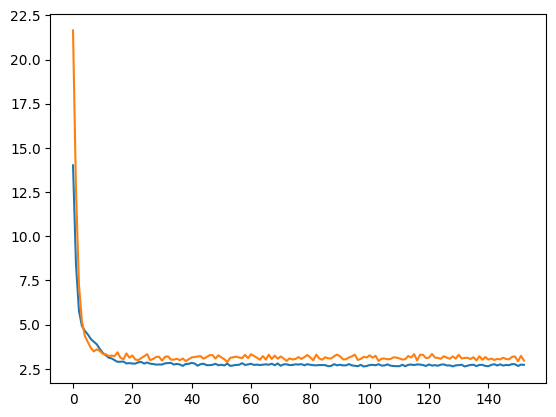

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.9605)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(5.2102)


In [21]:
print(vi.h_min_tilde)

-5.150602


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.558824435271826
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

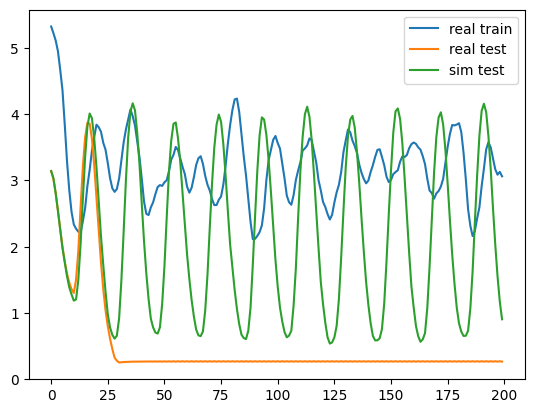

encoder [-5.469617 -8.      ]
initial_belief tensor([-5.0786,  0.1181])
real train tensor([-5.5043, -8.0075])
real test tensor([-1.9156, -5.1724])
sim tensor([-5.4764, -7.9715])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-5.0


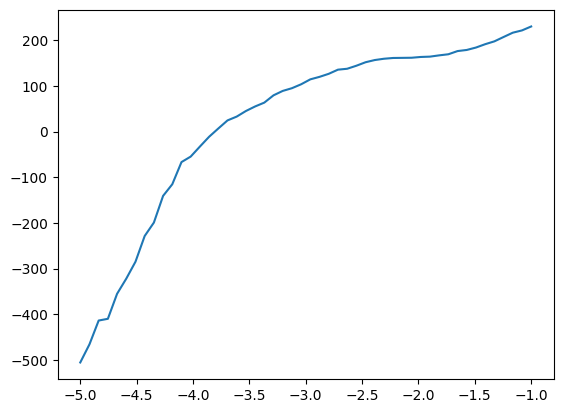

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.01803870190799765
tensor([-1.2660])
